# Probando la mejor red

In [1]:
import os
import random
import numpy as np
import tensorflow as tf

# De esta manera se ajusta la semilla para que sea replicable
seed_value= 448

os.environ['PYTHONHASHSEED']=str(seed_value)
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

In [2]:
from keras.datasets import mnist
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
import numpy as np

import os

# Establecer el número deseado de núcleos
os.environ["TF_NUM_THREADS"] = "10"

(train_X, train_Y),(test_X, test_Y) = mnist.load_data()

clases = 10
dimensiones = (28, 28, 1)

train_X = train_X.astype("float32") / 255
test_X = test_X.astype("float32") / 255

train_X = np.expand_dims(train_X, -1)
test_X = np.expand_dims(test_X, -1)

# convert class vectors to binary class matrices
train_Y = to_categorical(train_Y, clases)
test_Y = to_categorical(test_Y, clases)

### Funcion para crear y compilar el modelo

In [3]:
def create_model(lay_Filters=2, kernel_size=(2,2), pool_size=(2,2), cUnits=4, units=200, rate=0.5):
    model = keras.Sequential()

    # añadimos las capas
    model.add(keras.Input(shape=dimensiones))

    # da errores si es mayor que 4
    if lay_Filters > 4:
        lay_Filters=4
    filters = 32

    # capas convolucionales y de agregacion que queramos
    for i in range(lay_Filters):
        model.add(layers.Conv2D(filters, kernel_size=kernel_size, activation="relu", padding="same"))
        model.add(layers.MaxPool2D(pool_size=pool_size))
        filters *= 2

    # capa que aplana
    model.add(layers.Flatten())

    # capa que ayuda a reducir el sobreajuste
    model.add(layers.Dropout(rate=rate))

    # for con las capas de neuronas que queramos añadir
    for i in range(cUnits):
        model.add(layers.Dense(units, activation="relu"))

     # capa de salida, el nº de nueronas tiene que coincidir con el nº de clases
    model.add(layers.Dense(clases, activation="softmax"))



    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    return model

### Prueba del mejor modelo

In [4]:
mejorRed = create_model(3,(3,3),(2,2),4,800,0.75)

result = mejorRed.fit(
    train_X,
    train_Y,
    batch_size=512,
    epochs=30,
    validation_split=0.1
)




Epoch 1/30


106/106 [==============================] - 13s 108ms/step - loss: 0.5605 - accuracy: 0.8090 - val_loss: 0.0711 - val_accuracy: 0.9788
Epoch 2/30
106/106 [==============================] - 11s 104ms/step - loss: 0.1314 - accuracy: 0.9585 - val_loss: 0.0546 - val_accuracy: 0.9842
Epoch 3/30
106/106 [==============================] - 11s 104ms/step - loss: 0.0977 - accuracy: 0.9691 - val_loss: 0.0372 - val_accuracy: 0.9892
Epoch 4/30
106/106 [==============================] - 11s 104ms/step - loss: 0.0771 - accuracy: 0.9758 - val_loss: 0.0391 - val_accuracy: 0.9895
Epoch 5/30
106/106 [==============================] - 11s 103ms/step - loss: 0.0701 - accuracy: 0.9781 - val_loss: 0.0298 - val_accuracy: 0.9918
Epoch 6/30
106/106 [==============================] - 11s 103ms/step - loss: 0.0617 - accuracy: 0.9804 - val_loss: 0.0346 - val_accuracy: 0.9910
Epoch 7/30
106/106 [==============================] - 11s 103ms/step - loss: 0.0583 - accuracy: 0.9817 - val_loss: 0.0307 - v

In [5]:
score = mejorRed.evaluate(test_X, test_Y, verbose=10)
print("Test loss:", score[0])
print("Test accuracy:", score[1])
print("Test error rate:", (1 - score[1])*100)

Test loss: 0.020052164793014526
Test accuracy: 0.9940000176429749
Test error rate: 0.5999982357025146


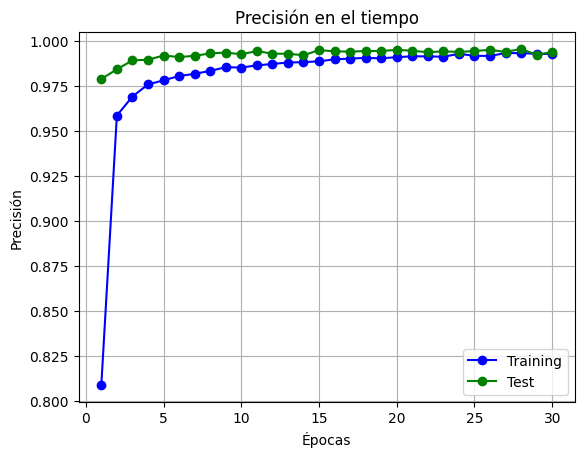

In [6]:
import matplotlib.pyplot as plt

# Obtener la precisión y pérdida en cada época
train_acc = result.history['accuracy']
val_acc = result.history['val_accuracy']

# Crear gráfica de la precisión
plt.plot(range(1, len(train_acc) + 1), train_acc, label='Training', marker='o', linestyle='-', color='b')
plt.plot(range(1, len(val_acc) + 1), val_acc, label='Test', marker='o', linestyle='-', color='g')
plt.title('Precisión en el tiempo')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.grid(True)
plt.show()

### Imprimir

In [7]:
prediccion = mejorRed.predict(test_X)
etiquetas = prediccion.argmax(axis=1)

impri = ""

for v in etiquetas:
    impri += str(v)

with open('results\convoMejor.txt', 'w', encoding='utf-8') as f:
    f.write(impri)

313/313 [==============================] - 1s 4ms/step
